In [1]:
!pip install selenium

In [33]:
from selenium import webdriver

import os
import urllib.request
import time

In [39]:
path = r'C:\Program Files (x86)\chromedriver.exe'

In [40]:
url_prefix = "https://www.google.com.sg/search?q="
url_postfix = "&source=lnms&tbm=isch&sa=X&ei=0eZEVbj3IJG5uATalICQAQ&ved=0CAcQ_AUoAQ&biw=939&bih=591"

save_folder = 'deneme'

In [41]:
def main():
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    download_images()

In [45]:
def download_images():
    topic = input("Ne indirmek istiyorsun")
    n_images = int(input('Kaç resim indirmek istiyorsun'))
    
    search_url = url_prefix+topic+url_postfix
    #print(search_url)
    
    
    driver = webdriver.Chrome(path)
    driver.get(search_url)
    
    value = 0
    for i in range(3):
        driver.execute_script("scrollBy("+ str(value) +",+1000);")
        value += 1000
        time.sleep(1)
    
    elem1 = driver.find_element_by_id('islmp')
    sub = elem1.find_elements_by_tag_name('img')
    
    for j,i in enumerate(sub):
        if j < n_images:
            src = i.get_attribute('src')                         
            try:
                if src != None:
                    src  = str(src)
                    print(src)
                    
                    urllib.request.urlretrieve(src, os.path.join(save_folder, topic+str(j-1)+'.jpg'))
                else:
                    raise TypeError
            except Exception as e:            
                print(f'hata {e}')
    
    driver.close()

Ne indirmek istiyorsun futbol
Kaç resim indirmek istiyorsun 5








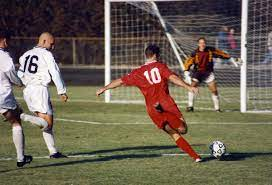
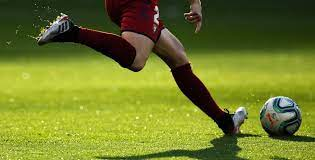
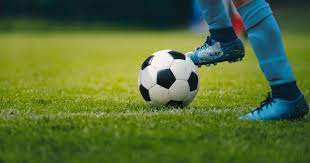
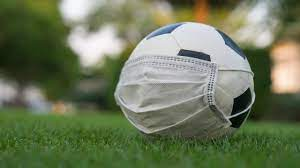
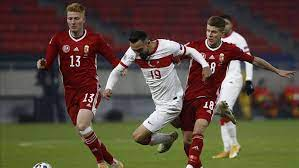

In [50]:
if __name__ == "__main__":
    main()